<a href="https://colab.research.google.com/github/JossefaRodriguez/prediccion_calidad_vino_core/blob/main/Predicci%C3%B3n_de_Calidad_del_Vino_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación básica / Predicción de Calidad del Vino (Core)


##  1. Carga y Exploración de Datos

In [374]:
# Importar Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [311]:
# Conectar a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [312]:
# Cargar dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience BootCamp/Machine Learning/CORES/CORE4/WineQT.csv")

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [314]:
# Usamos lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   ph                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [316]:
# Se toma una muestra aleatoria del dataset para conocer el comportamiento de algunos datos
df.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
800,7.2,0.48,0.07,5.5,0.089,10.0,18.0,0.99684,3.37,0.68,11.2,7,1133
635,8.3,0.31,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5,7,898
454,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,6,639
979,7.5,0.57,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,6,1380
676,6.4,0.57,0.12,2.3,0.120,25.0,36.0,0.99519,3.47,0.71,11.3,7,958
182,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5,258
207,11.6,0.42,0.53,3.3,0.105,33.0,98.0,1.00100,3.20,0.95,9.2,5,289
897,6.9,0.41,0.31,2.0,0.079,21.0,51.0,0.99668,3.47,0.55,9.5,6,1268
1113,7.8,0.60,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5,1560
510,8.4,0.56,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,5,718


In [317]:
# Se buscan valores nulos dentro de las columnas del dataset
df.isna().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,0
sulphates,0


In [318]:
# Se buscan valores duplicados
df.duplicated().sum()

np.int64(0)

In [319]:
# Con calculos estadisticos y graficos se analizaran posibles datos fuera de rango

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile_acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric_acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual_sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free_sulfur_dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total_sulfur_dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
ph,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


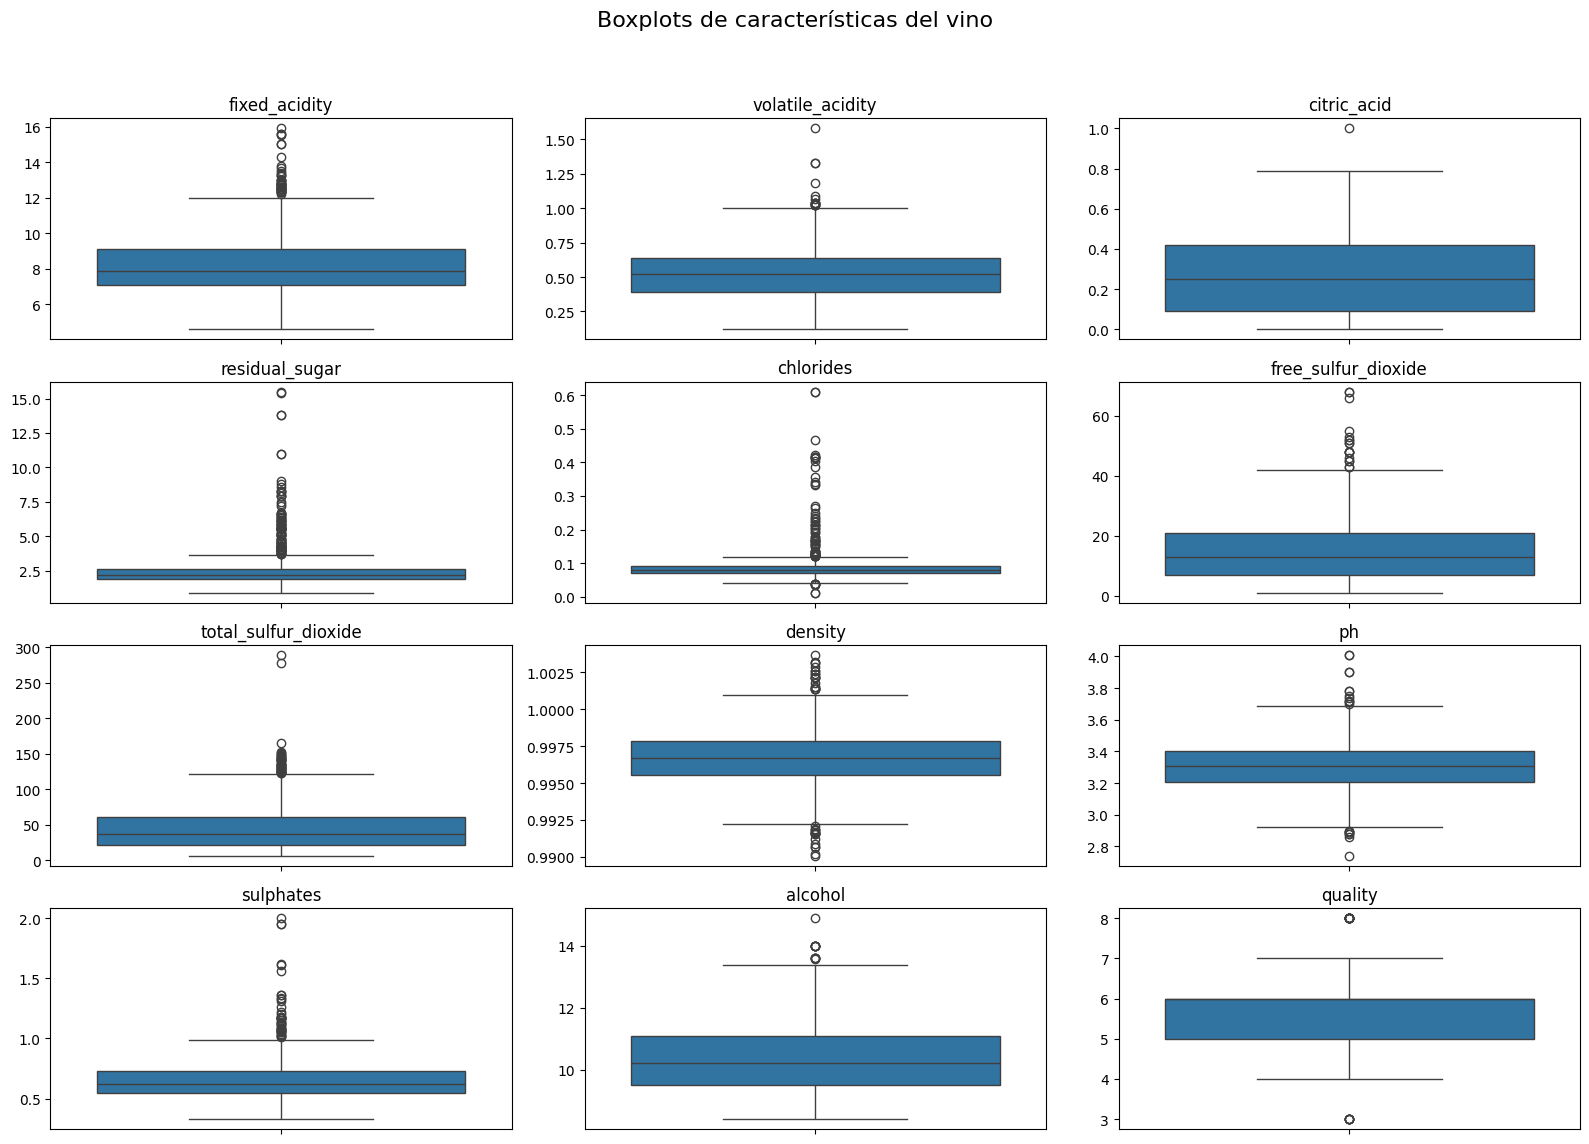

In [320]:
# Selección de columnas numéricas (excluyendo 'id')
columnas = df.drop(columns='id').select_dtypes(include='number').columns

# Dimensiones del grid
filas, columnas_grid = 4, 3

# Crear figura y ejes
fig, axs = plt.subplots(filas, columnas_grid, figsize=(16, 12))
fig.suptitle("Boxplots de características del vino", fontsize=16)

# Aplanar los ejes
axs = axs.flatten() # convertir una estructura multidimensional en una sola lista lineal

# Dibujar boxplots verticales con map y lambda
list(map(lambda ax, col: (  # el map aplica una función a todos los elementos de una lista
    sns.boxplot(data=df, y=col, ax=ax),
    ax.set_title(col),
    ax.set_ylabel(""),
    ax.tick_params(axis='y', labelrotation=0)
), axs[:len(columnas)], columnas))

# Eliminar ejes vacíos
for ax in axs[len(columnas):]:
    fig.delaxes(ax)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Analisis
- Según lo visualizado, existen varias columnas (variables) con datos fuera de rango por lo que es importante menajar estos datos a fin de que no afecten las posible predicciones futuras con los modelos a desarrollar.

In [321]:
# Visualizar los valores fuera de rango por columna

# Se crea un diccionario vacio donde se guardarán los valores atipicos
diccionario_atipicos = {}

# como todas las columnas son numericas iteraremos sobre todas exceptuando el id, ya que no es un dato que pueda inferir en las futuras predicciones
for col in df.drop(columns='id').columns:
    Q1 = df[col].quantile(0.25) # Primer cuartil (percentil 25)
    Q3 = df[col].quantile(0.75) # Tercer cuartil (percentil 75)
    IQR = Q3 - Q1 # Rango intercuartílico que mide la dispersión del 50% central de los datos

    # Se calculan los limites inferiores y superiores para identificar valores atipicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Se filtran los valores atipicos de las columnas
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # Se guardan los valores atipicos
    diccionario_atipicos[col] = len(outliers)

# Ver cuántos outliers hay por columna
diccionario_atipicos

{'fixed_acidity': 44,
 'volatile_acidity': 14,
 'citric_acid': 1,
 'residual_sugar': 110,
 'chlorides': 77,
 'free_sulfur_dioxide': 18,
 'total_sulfur_dioxide': 40,
 'density': 36,
 'ph': 20,
 'sulphates': 43,
 'alcohol': 12,
 'quality': 22}

In [322]:
# Se analizarán los valores atipicos de la columna quality ya que se establece un rango entre 0 y 10
df['quality'].value_counts()
"""
Sacando los valores, nos percatamos que no existen valores sobre 10 o valores negativos por lo que esos valores atipicos detectados no estarian
infiriendo negativamente dentro de los modelos que se puedan desarrollar, solo podemos identificar que existen pocos vinos que alcanzan una calidad alta
y otras que alcanzan una calidad baja, por ende estos valores atipicos nos podrian servir cuando el modelo predictivo necesite predecir valores mas extremos respecto
a las calidad por lo tanto se mantendrán
"""

'\nSacando los valores, nos percatamos que no existen valores sobre 10 o valores negativos por lo que esos valores atipicos detectados no estarian \ninfiriendo negativamente dentro de los modelos que se puedan desarrollar, solo podemos identificar que existen pocos vinos que alcanzan una calidad alta\ny otras que alcanzan una calidad baja, por ende estos valores atipicos nos podrian servir cuando el modelo predictivo necesite predecir valores mas extremos respecto\na las calidad por lo tanto se mantendrán\n'

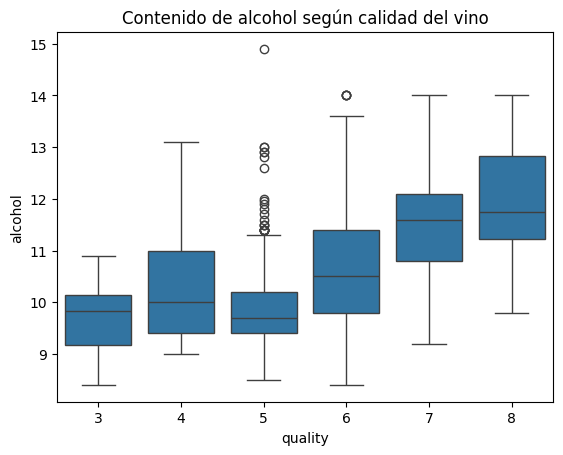

In [323]:
# Se analizarán los datos de la variable alcohol, y se relacionaran con la variable quality para determinar el comportamiento de estos datos
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Contenido de alcohol según calidad del vino")
plt.show()

### Analisis
- Según lo que podemos visualizar, si bien existen valores atipicos en la variable o columna alchol, estos estan dentro de la puntuacion 5 y 6 de calidad del vino, por ende podriamos interpretar que estos vinos en particular, mantienen una calidad media con altos niveles de alcohol, lo que se contrapone a lo que se visuzalia de manera general en el grafico que nos indica que a mayor calidad del vino mayor es el nivel de alcohol, por ende no se consideraran como valores erroneos para eliminar si no mas bien como casos que pudiesen suceder ya que quizás existan otras variables que influyen en que la calidad no esta por encima de la media.

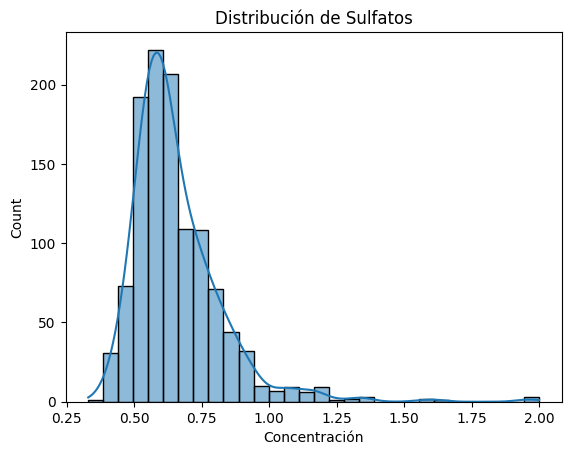

In [324]:
# Para la columna o variable sulfatos, veremos la distribución por medio de un grafico y tambien relacionaremos la cantidad de esta variable con la calidad del vino

sns.histplot(df['sulphates'], bins=30, kde=True)
plt.title("Distribución de Sulfatos")
plt.xlabel("Concentración")
plt.show()


### Analisis
- Según lo visualizado en el grafico gran parte de la concentracion de valores se agrupan entre 0.50 y 0.75,
los valores infrecuentes están entre 0 y aprox 0.30 y 0.9 y 2.00.
Tambien podemos visualizar que existe un sesgo hacia la derecha donde se encuntran los valores atipicos mostrados en el boxplot realizado anteriormente


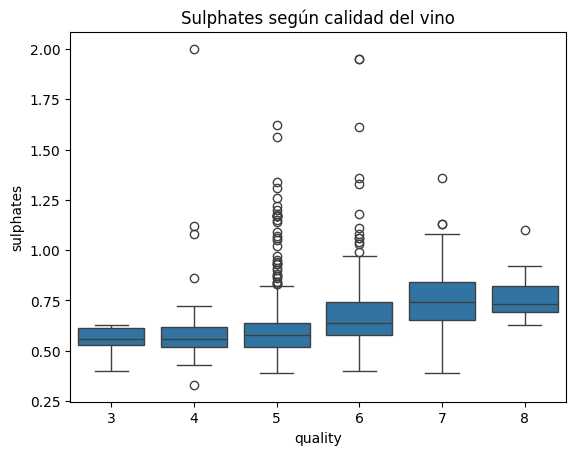

In [325]:
# Se crea el grafico para conocer la relacion entre sulfatos y calidad del vino
sns.boxplot(x='quality', y='sulphates', data=df)
plt.title("Sulphates según calidad del vino")
plt.show()



### Analisis
- Entendiendo que los sulfatos actuan como preservantes, vinos de calidad con puntaje 7 y 8 tienen niveles moderadamente altos y estables de sulfatos, lo que nos podria sugerir que una dosis controlada puede estar asociada a buena calidad. En cambio, los vinos de calidad baja tienen más dispersión, lo que podría reflejar procesos menos cuidados.
- En casi todos los grupos, especialmente en calidad 5 y 6, que es donde también veíamos los valores atípicos de alcohol. Estos grupos parecen tener una mezcla diversa de perfiles químicos

In [326]:
"""
Para esta variable, se concidera mejor eliminar estos valores atipicos, debido a que
estos datos podrían distorsionar modelos de regresión y análisis estadísticos al afectar la media y las correlaciones
"""
# se utilizará una forma parecdia a la utilizada anteriormente
# Se calculara el IQR
Q1 = df['sulphates'].quantile(0.25)
Q3 = df['sulphates'].quantile(0.75)
IQR = Q3 - Q1

#  Se calcularan los limites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [327]:
# Filtrar el dataframe conservando solo los valores dentro de los limines calculados
df = df[(df['sulphates'] >= lower_bound) & (df['sulphates'] <= upper_bound)]

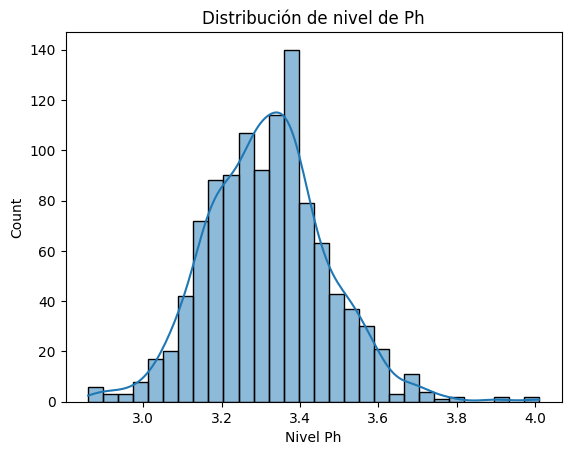

In [328]:
# Ahora analizaremos los valores atipicos de Ph

# Se crea un grafico histograma para conocer la distribución de ph
sns.histplot(df['ph'], bins=30, kde=True)
plt.title("Distribución de nivel de Ph")
plt.xlabel("Nivel Ph")
plt.show()

### Analisis
- Según lo visualizado en el grafico, se ve una distribución casi simetrica por lo que podemos inferir que gran cantidad de los vinos se encuentra en un rango de acidez intermedio.
- Se podrían determinar algunos valores atipicos de 3.0 y 4.0.

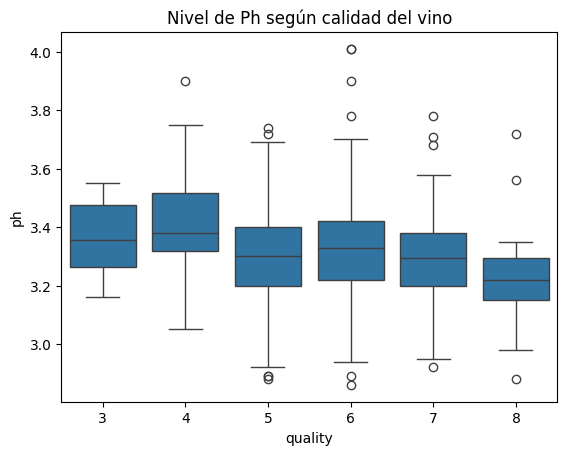

In [329]:
# Se crea el grafico para analizar relacion entre ph y calidad de vino
sns.boxplot(x='quality', y='ph', data=df)
plt.title("Nivel de Ph según calidad del vino")
plt.show()

### Analisis
- Entre los puntajes de calidad 5, 6 y 7  se identifica que el pH no varía demasiado entre vinos de calidad media y alta.
- Se visualiza una ligera tendencia descendnete, ya que a medida que aumenta la calidad aumenta la acidez.
- Respecto a los valores atipicos, se ubican por debajo de 3.0 o por encima de ~3.7 aún así, no hay una gran distancia ni parecen ser errores evidentes.

En conclusión respecto a la variable ph y sus valores atipicos, se mantendrán debido a que a simple analisis no son errores, y aque estos valores aun se encuentran dentro de los rangos esperados, entendiendo que quizás algunos vinos tienen niveles de ph mas altos de otros.

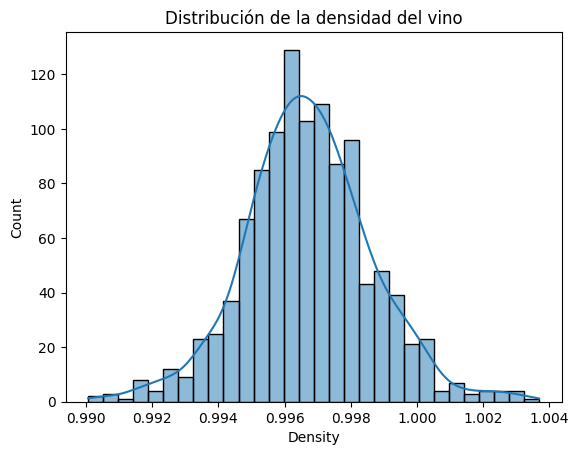

In [330]:
# Se crea grafico histograma para conocer la distribucion de la densidad del vino
sns.histplot(df['density'], bins=30, kde=True)
plt.title("Distribución de la densidad del vino")
plt.xlabel("Density")
plt.show()

### Analisis
- La distribucipón se ve concentrada en un rango entre 0.995 y 0.998 con una cola hacia valores mas altos, que podrian explicar los valores atipicos
- Los valores más altos de densidad, aunque menos frecuentes, podrían estar asociados a vinos con mayor cantidad de azúcar residual o menor grado alcohólico
- La forma ligeramente sesgada del gráfico ayuda a identificar que existen vinos con perfiles químicos diferentes, pero dentro de un rango razonable.

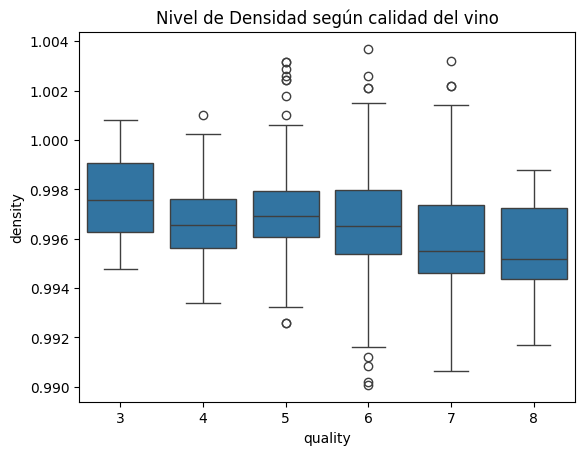

In [331]:
# Se crea grafico para conocer la relacion que existe entre la densidad y la calidad del vino
sns.boxplot(x='quality', y='density', data=df)
plt.title("Nivel de Densidad según calidad del vino")
plt.show()

### Analisis
- Se observa que a medida que aumenta la puntuación de calidad, la densidad tiende a disminuir ligeramente, lo cual sugiere que los vinos de mayor calidad podrían tener menor densidad.
- las cajas asociadas a calidades 5 y 6 presentan mayor dispersión, lo que indica más variabilidad química en vinos de calidad media
- También se identifican valores atipicos, pero mas asociados al comportamiento propio de la variable que a datos erroneos o muy fuera de rango

En conclusion si bien existen valores atipicos estos se mantendra ya que estan dentro de los rangos esperados, por lo que no debiese afectar principalmente la prediccion de los modelos que se desarrollaran mas adelante

In [332]:
# Se hará lo mismo para las siguientes variables con valores atipicos

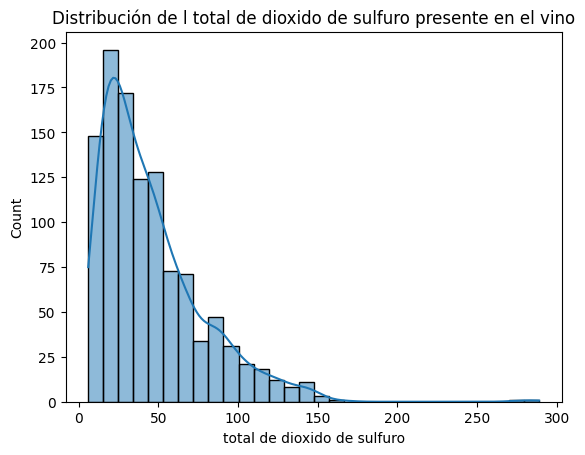

In [333]:
# Se crea grafico histograma para conocer la distribucion del total de dioxido de sulfuro presente en el vino
sns.histplot(df['total_sulfur_dioxide'], bins=30, kde=True)
plt.title("Distribución de l total de dioxido de sulfuro presente en el vino")
plt.xlabel("total de dioxido de sulfuro")
plt.show()

### Analisis
- La mayoría de los vinos tienen concentraciones de dióxido de azufre total entre 0 y 100, lo que se refleja en la punta del histograma.
- La curva azul muestra una cola derecha más alargada, lo que indica presencia de valores atípicos con concentraciones significativamente altas, aunque poco frecuentes

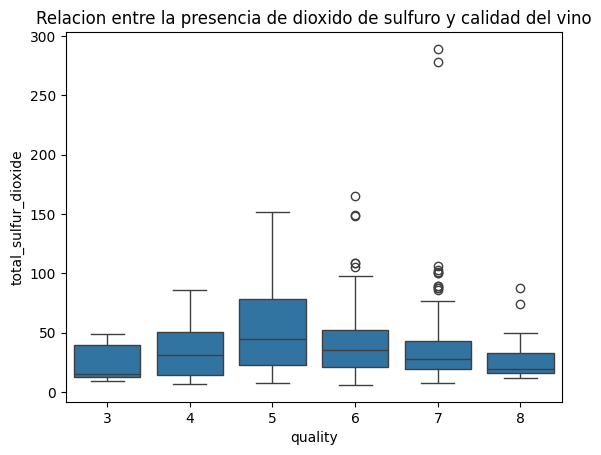

In [334]:
# Se crea grafico para conocer la relacion que existe entre la total presente de dioxido de sulfuro y la calidad del vino
sns.boxplot(x='quality', y='total_sulfur_dioxide', data=df)
plt.title("Relacion entre la presencia de dioxido de sulfuro y calidad del vino")
plt.show()

### Analisis
- Según lo visualizado a medida que aumenta la calidad del vino (de 3 a 8), los niveles de total sulfur dioxide tienden a disminuir ligeramente
- los boxplot  correspondientes a calidades medias (5 y 6) muestran mayor dispersión y una concentración más alta de dióxido de sulfuro
- los outliers en todos los niveles indican casos puntuales donde los niveles fueron excepcionalmente altos, pero siguen dentro de rangos físicamente posibles en algunos vinos, entendiendo que esto lo utilizan para prevenir la oxidación y el crecimiento de microorganismos, protegiendo el color, sabor y estabilidad del vino.

En conclusión estos valores atipicos encontrados en la variable 'total_sulfur_dioxide' si bien son altos,son rangos validos y dado que su frecuencia es baja y no alteran de manera significativa la estructura del conjunto de datos, se determina conservarlos. Esta decisión se fundamenta en la necesidad de preservar la variabilidad natural del dataset.

In [335]:
# Se hará lo mismo para las siguientes variables con valores atipicos

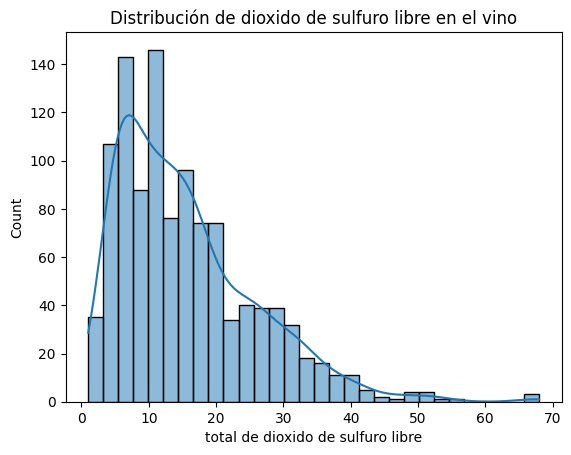

In [336]:
# Se crea grafico histograma para conocer la distribucion del dioxido de sulfuro libre
sns.histplot(df['free_sulfur_dioxide'], bins=30, kde=True)
plt.title("Distribución de dioxido de sulfuro libre en el vino")
plt.xlabel("total de dioxido de sulfuro libre")
plt.show()

### Analisis
- La distribución del dióxido de sulfuro libre en el vino muestra una fuerte concentración entre 0 y 20 unidades, lo que refleja que la mayoría de los vinos requieren solo una cantidad baja de esta sustancia para su conservación
- Aunque existen valores atipicos, estos se encuentran dentro de rangos validos y no distorsionan significativamente la forma general de la distribución

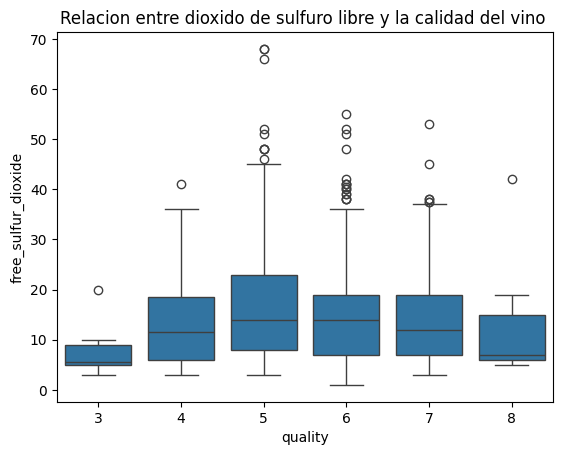

In [337]:
# Se crea grafico para conocer la relacion que existe entre dioxido de sulfuro libre y la calidad del vino
sns.boxplot(x='quality', y='free_sulfur_dioxide', data=df)
plt.title("Relacion entre dioxido de sulfuro libre y la calidad del vino ")
plt.show()

### Analisis
- Segun lo visualizado, no existe una tendencia clara en la relacion de estas dos variables, las medianas se mantienen relativamente estables entre los distintos niveles de calidad, aunque los vinos con puntuación 5 y 6 muestran mayor dispersión y varios valores atípicos
- Los outliers detectados, aunque visibles, se mantienen dentro de rangos válidos y no alteran significativamente la interpretación general

En conclusión, aunque se detectaron valores atípicos en la variable free_sulfur_dioxide, se decidió conservarlos ya que se encuentran dentro de rangos esperados y no distorsionan significativamente la distribución ni afectan la interpretación del análisis.

In [338]:
# Se hará lo mismo para las siguientes variables con valores atipicos

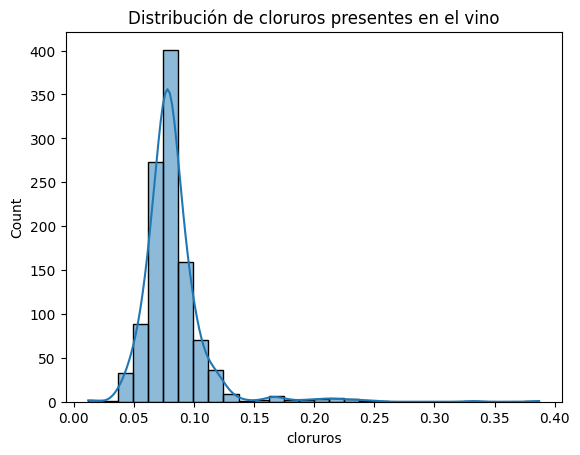

In [339]:
# Se crea grafico histograma para conocer la distribucion de cloruros
sns.histplot(df['chlorides'], bins=30, kde=True)
plt.title("Distribución de cloruros presentes en el vino")
plt.xlabel("cloruros")
plt.show()

### Analisis
- La distribución de los cloruros en el vino muestra una fuerte concentración entre 0.05 y 0.10, lo que indica que la mayoría de los vinos presentan niveles bajos de este componente
- La curva azul revela una cola derecha moderada, donde algunos vinos poseen concentraciones más elevadas. Sin embargo, estos valores atipicos son pocos y se mantienen dentro de rangos esperados, por lo que no afectaría significativamente el analisis general

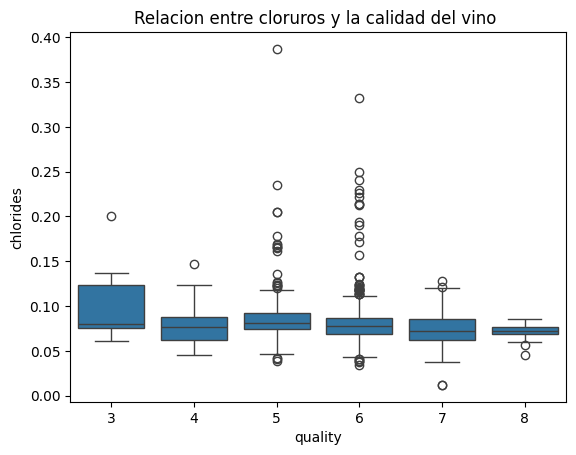

In [340]:
# Se crea grafico para conocer la relacion que existe entre cloruros y la calidad del vino
sns.boxplot(x='quality', y='chlorides', data=df)
plt.title("Relacion entre cloruros y la calidad del vino ")
plt.show()

### Analisis
- La concentración de chlorides se mantiene relativamente estable entre los distintos niveles de calidad del vino. Las medianas son similares y no se observa una tendencia clara ascendente ni descendente.
- Aunque hay algunos valores atípicos, estos son escasos y se encuentran dentro de un rango esperado

En conclusion, se identificaron valores atípicos en la variable chlorides, se opta por conservarlos, ya que se encuentran dentro de rangos posibles y su baja frecuencia no altera significativamente la distribución ni afecta la interpretación general del analisis.

In [341]:
# Se hará lo mismo para las siguientes variables con valores atipicos

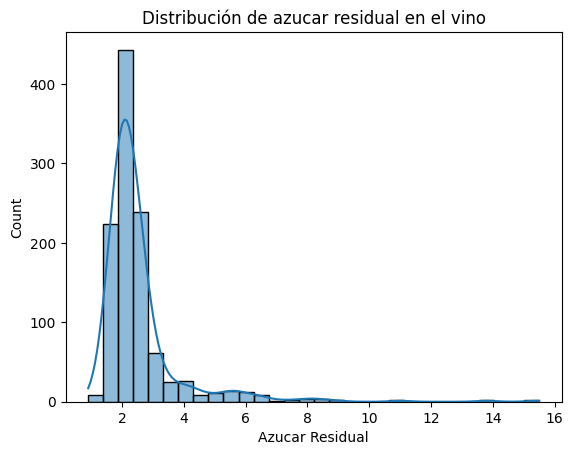

In [342]:
# Se crea grafico histograma para conocer la distribucion de azucar residual
sns.histplot(df['residual_sugar'], bins=30, kde=True)
plt.title("Distribución de azucar residual en el vino")
plt.xlabel("Azucar Residual")
plt.show()

### Analisis
- La distribución del azucar residual muestra una alta concentración de vinos con niveles entre 1 y 4 unidades.
- A medida que el contenido de azúcar aumenta, la frecuencia disminuye rápidamente, como lo refleja la cola derecha del grafico. Esta forma sugiere que los valores mas altos de azucar, aunque poco frecuentes, representan casos reales y no errores

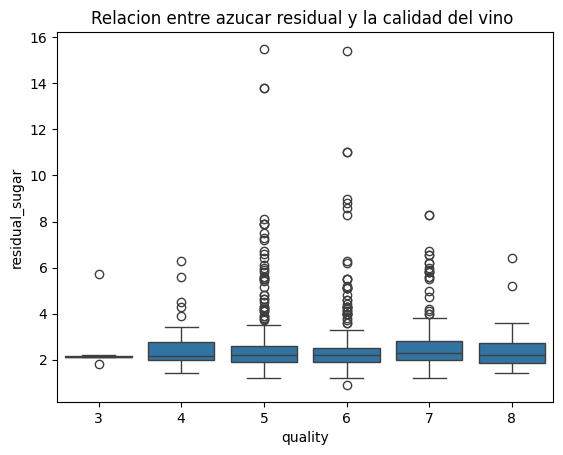

In [343]:
# Se crea grafico para conocer la relacion que existe entre azucar residual y la calidad del vino
sns.boxplot(x='quality', y='residual_sugar', data=df)
plt.title("Relacion entre azucar residual y la calidad del vino ")
plt.show()

### Analisis
- El gráfico muestra que los niveles de azucar residual se mantienen relativamente constantes entre los distintos niveles de calidad del vino
- No se observa una tendencia clara de aumento o disminución de azúcar a medida que aumenta la calidad.
- Las medianas son similares, lo que sugiere que el contenido de azúcar no es un factor determinante en la puntuación del vino dentro de este conjunto
- Existen algunos valores atípicos en cada grupo, pero su presencia es esperable y representa estilos de vino particulares

En conclusion: Aunque se detectaron valores atípicos en la variable residual sugar, estos reflejan estilos de vino reales por ejemplo podrian ser los vinos mas dulces y su frecuencia es baja. por lo que se conservarán, ya que no afectan negativamente la distribución general ni el análisis predictivo.

In [344]:
# Se hará lo mismo para las siguientes variables con valores atipicos

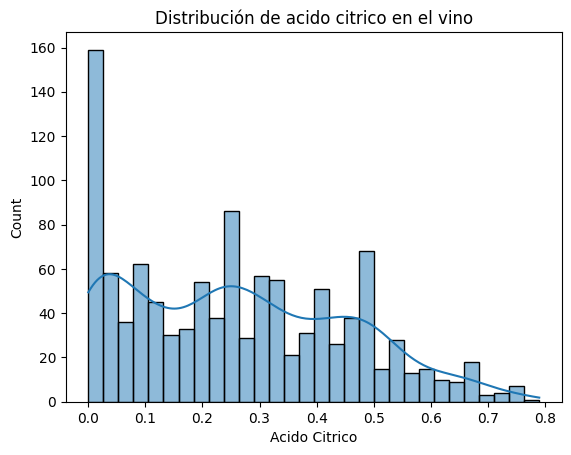

In [345]:
# Se crea grafico histograma para conocer la distribucion del acido citrico
sns.histplot(df['citric_acid'], bins=30, kde=True)
plt.title("Distribución de acido citrico en el vino")
plt.xlabel("Acido Citrico")
plt.show()

### Analisis
- La distribución del ácido cítrico en el vino presenta una alta concentración en el valor 0.0, lo que indica que muchos vinos en el conjunto no poseen este componente o lo tienen en cantidades muy bajas.
- Desde ahíla frecuencia disminuye a medida que aumenta la concentración de acido citrico

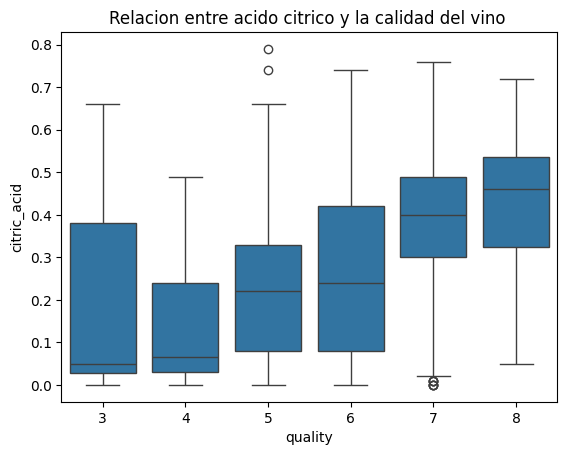

In [346]:
# Se crea grafico para conocer la relacion que existe entre acido citricol y la calidad del vino
sns.boxplot(x='quality', y='citric_acid', data=df)
plt.title("Relacion entre acido citrico y la calidad del vino ")
plt.show()

### Analisis
- El gráfico muestra que los niveles de acido citrico varian levemente entre los distintos niveles de calidad del vino. Las medianas son relativamente similares, aunque se observa una ligera tendencia creciente en calidades más altas

En cocnlusion la variable citric_acid, se identificó únicamente un valor atípico. Esto indica que la distribución es bastante compacta y que la mayoría de los datos se encuentran dentro de rangos esperados por lo tanto no se realizará nada con este valor

In [347]:
# Se hará lo mismo para las siguientes variables con valores atipicos

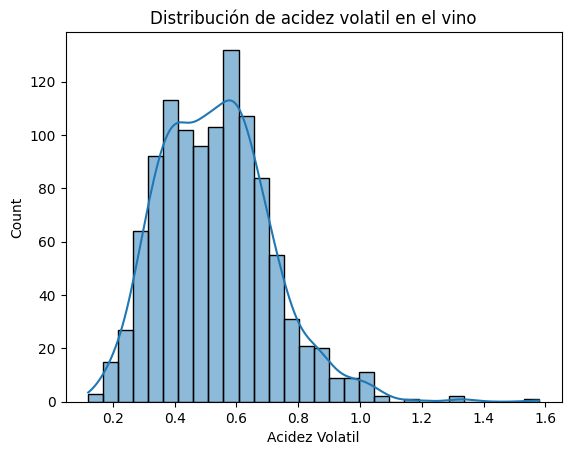

In [348]:
# Se crea grafico histograma para conocer la distribucion del acicez volatil
sns.histplot(df['volatile_acidity'], bins=30, kde=True)
plt.title("Distribución de acidez volatil en el vino")
plt.xlabel("Acidez Volatil")
plt.show()

### Analisis
- El histograma muestra que la mayoría de los vinos tienen una acidez volátil entre 0.4 y 0.6.
- A medida que la acidez aumenta, la frecuencia de vinos disminuye, formando una clara cola hacia la derecha, típica de una distribución sesgada.
- Esta forma sugiere que existen algunos vinos con acidez significativamente más alta, son menos frecuentes, estos valores se consideran posibles dentro de la producción real y no distorsionan la distribución general

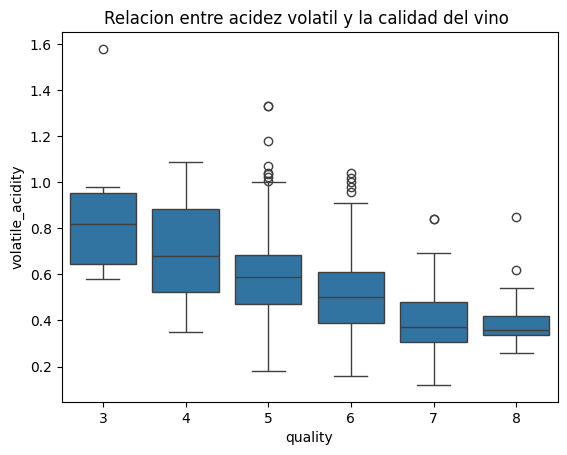

In [349]:
# Se crea grafico para conocer la relacion que existe entre acidez volatil y la calidad del vino
sns.boxplot(x='quality', y='volatile_acidity', data=df)
plt.title("Relacion entre acidez volatil y la calidad del vino ")
plt.show()

### Analisis
- Existe una clara tendencia, los vinos de mayor calidad suelen presentar menores niveles de acidez volátil. Las medianas de calidad 7 y 8 están por debajo de las de calidad 4 y 5, lo que sugiere que niveles altos de acidez podrían afectar negativamente la puntuación
- Hay una mayor dispersión y presencia de outliers en vinos de calidad media, sin embargo estos valores extremos siguen dentro de rangos posibles

En cocnlusion:  Aunque se identificaron algunos valores atípicos en la variable volatile_acidity, estos se encuentran dentro de rangos válidos y representan casos reales. Su conservación asegura una representación más completa del conjunto de datos y no impacta negativamente en la interpretación ni en el desempeño de los modelos predictivos.

In [350]:
# Se hará lo mismo para las siguientes variables con valores atipicos

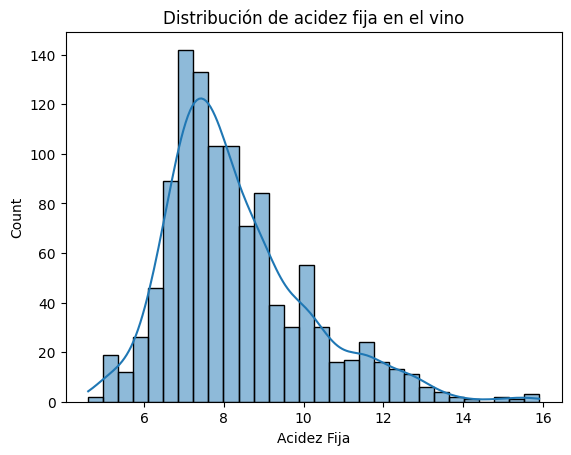

In [351]:
# Se crea grafico histograma para conocer la distribucion del acicez fija
sns.histplot(df['fixed_acidity'], bins=30, kde=True)
plt.title("Distribución de acidez fija en el vino")
plt.xlabel("Acidez Fija")
plt.show()

### Analisis
- La mayoría de los vinos presentan niveles de fixed acidity entre 6 y 8, con un pico evidente en torno a 7, lo que indica una concentración bastante uniforme en ese rango
- Aunque hay algunos vinos con niveles más altos, cercanos a 16, su frecuencia es mucho menor, formando una cola derecha. Esto sugiere la presencia de unos pocos casos con perfiles más ácidos, que siguen siendo válidos

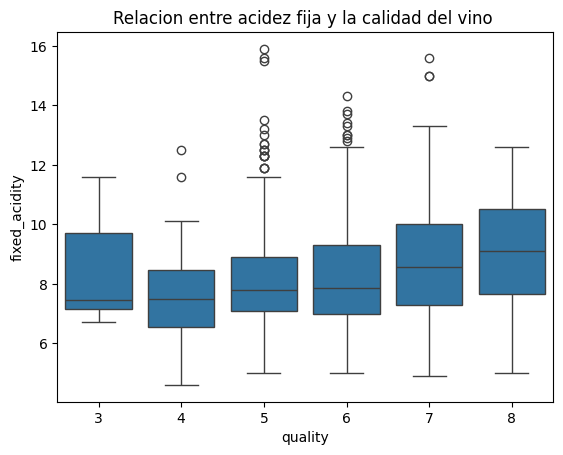

In [352]:
# Se crea grafico para conocer la relacion que existe entre acidez fija y la calidad del vino
sns.boxplot(x='quality', y='fixed_acidity', data=df)
plt.title("Relacion entre acidez fija y la calidad del vino ")
plt.show()

### Analisis
- El gráfico muestra que la acidez fija tiende a ser ligeramente más alta en vinos de mejor calidad. Las medianas aumentan levemente conforme mejora la puntuación del vino, especialmente en calidad 7 y 8. Sin embargo, esta tendencia es suave. Se observa también mayor dispersión y presencia de outliers en algunas calidades medias
- Los valores extremos son escasos y se mantienen dentro de rangos posibles

En conclusion se detectaron algunos valores atípicos en fixed_acidity, pero se decidió conservarlos debido a que su frecuencia es baja y se ubican dentro de rangos  válidos. Representan casos reales en la vinificación y no comprometen la interpretación ni el desempeño de futuros modelos predictivos.

##  2. Preprocesamiento de Datos



<Axes: >

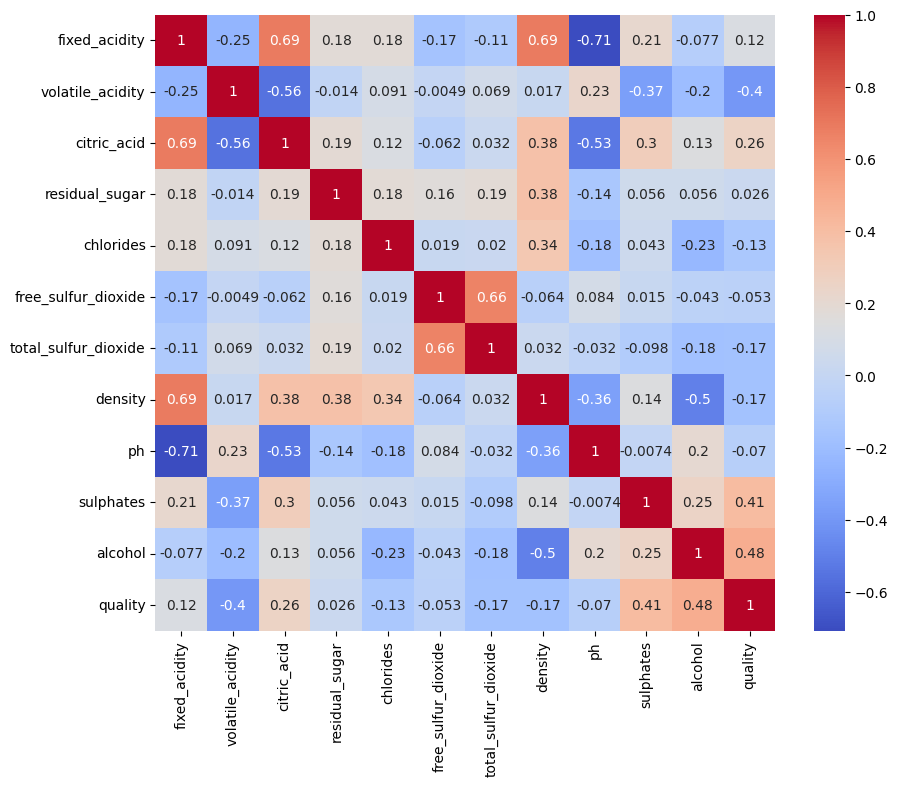

In [353]:
# Se usara correlación como ejemplo para seleccionar variables más relacionadas con 'quality'
# Se deja fuera la columna id
df_sin_id = df.drop('id', axis=1)
# Se calcula la matriz de correlación
matriz_correlacion = df_sin_id.corr()
# mostrar la matriz
plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

Se utilizarán las variables que tienen una relacion mas fuerte con mi variable objetivo que sera calidad:
'alcohol', 'volatile_acidity', 'sulphates', 'citric_acid', 'fixed_acidity', 'density'

In [354]:
# Seleccionar las variables para el modelo y separar las predictoras
selected_features = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid', 'fixed_acidity', 'density']

X = df[selected_features]
y = df['quality']

In [355]:
# Split. Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [356]:
# Seleccion de columnas numericas, que para este caso son las unicas que existen en el dataset
columnas_numericas = X.select_dtypes(include=["int64", "float64"]).columns

##  3. Entrenamiento de Modelos de Clasificación

### Resgresion Lineal

In [357]:
# Preprocesador.
preprocessorRL = ColumnTransformer([
    ("numericas", StandardScaler(), columnas_numericas)
])

In [358]:
pipeline_reglin = Pipeline([
    ("preprocesador", preprocessorRL),
    ("regressor", LinearRegression())
])

In [359]:
# Entrenamiento
pipeline_reglin.fit(X_train, y_train)
y_pred_rl = pipeline_reglin.predict(X_test)

mse_rl = mean_squared_error(y_test, y_pred_rl)
r2_rl = r2_score(y_test, y_pred_rl)

### KNN

In [360]:
# Preprocesador.
preprocessor_knn = ColumnTransformer([
    ("numericas", StandardScaler(), columnas_numericas)
])

In [361]:
pipeline_knn = Pipeline(steps=[
    ("preprocesador", preprocessor_knn),
    ("regresor",KNeighborsRegressor())
])

In [362]:
# Entrenamiento
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

### RandomForest

In [369]:
# Preprocesador para RandomForest
preprocesador_rf = ColumnTransformer(transformers=[
    ('num', 'passthrough', columnas_numericas),
])

In [370]:
# Pipeline.
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocesador_rf),
     ('regresor', RandomForestRegressor(n_estimators=100, random_state=42))
])



In [371]:
# Entrenamiento
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

##  4. Evaluación de Modelos

## 5. Análisis y Comparación de Resultados

In [373]:
# Comparación entre los modelos

comparacion = pd.DataFrame({
    'Modelo': ['Modelo Regresion Lineal', 'Modelo RandomForest', 'Modelo KNN'],
    'MSE': [mse_rl, mse_rf, mse_knn],
    'R²': [r2_rl, r2_rf, r2_knn]
})

print(comparacion)

                    Modelo       MSE        R²
0  Modelo Regresion Lineal  0.407100  0.328781
1      Modelo RandomForest  0.318647  0.474621
2               Modelo KNN  0.378909  0.375261


- Random Forest logró el menor error promedio (MSE = 0.3186), lo que indica predicciones más precisas y mejor desempeño general en el ajuste del modelo.

- Random Forest también obtuvo el mayor R² (0.4746), es decir, tiene la mejor capacidad para explicar la variabilidad de la calidad del vino a partir de sus propiedades físico-químicas.

- KNN mostró un MSE intermedio (0.3789) y un R² competitivo (0.3753), lo que lo convierte en una opción sólida aunque más sensible a la escala de datos y valores atípicos.

- Regresión Lineal sigue siendo útil como modelo base por su rapidez e interpretabilidad, pero obtuvo el mayor MSE (0.4071) y el menor R² (0.3288), lo que evidencia limitaciones al capturar relaciones no lineales entre variables.

### Mejor Modelo
- RandomForestClassifier destaca claramente por ser el modelo más equilibrado y robusto:

- Predice clases directamente sin necesidad de redondear salidas continuas.

- Se adapta eficazmente a relaciones no lineales y variables interdependientes.

- Logra excelente rendimiento tanto en regresión como en clasificación (si se aplica como clasificador).

- Robusto frente a ruido, escalamiento y outliers, ideal para datasets como el del vino.

In [375]:
# Optimizacion del mejor modelo

# Preprocesador.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", "passthrough", columnas_numericas)
])

# Model.
pipeline_forest = Pipeline([
    ("pp", preprocessor_forest),
    ("model", RandomForestRegressor( n_estimators=100, max_depth=25, random_state=42))
])

In [376]:
# Optimizacion de hiperparametros.
forest_params = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [10, 20, None]
}

forest_grid = GridSearchCV(pipeline_forest, forest_params, cv=10, scoring="r2", n_jobs=-1)
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         Index(['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid',
       'fixed_acidity', 'density'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(max_depth=25,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20, None],
                         'model__n_estimators': [50, 100, 200]},
             scoring='r2')

In [377]:
# Evaluación.
forest_best = forest_grid.best_estimator_
y_pred_forest = forest_best.predict(X_test)

print("Forest Regressor")
print("Mejores parámetros:", forest_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_forest))

Forest Regressor
Mejores parámetros: {'model__max_depth': None, 'model__n_estimators': 200}
R²: 0.47376719468574346


Tras la optimizacion del modelo podemos determinar que no existe una variacion significativa, al contrario hay una baja en el R2 minima, pero existe, por lo cual se continuará con el modelo original.